In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [3]:
np.random.seed(42)

In [4]:
print(df.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [5]:
df.info

<bound method DataFrame.info of      Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order Date Region  Sales  Discount  Profit       State  
0     11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1     11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2     06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3     10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4     10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
...          ...    ...    ...       ...     ...         ...  
9989  12/24/2015   West    945      0.16  359.10  Tamil Nadu  
9990  07-12-2015   West   1195      0.26   71.70  Tamil Nadu  
9991  06-06-2017   West   1567      0.16  501.44  Tamil Nadu  
9992  10/16/2018   West   1659      0.15  597.24  Tamil Nadu  
9993   4/17/2018   West   1034      0.28  165.44  Tamil Nadu  

[9994 rows x 11 columns]>

In [6]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [7]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [8]:
df.count()

,0
Order ID,9994
Customer Name,9994
Category,9994
Sub Category,9994
City,9994
Order Date,9994
Region,9994
Sales,9994
Discount,9994
Profit,9994


In [9]:
print(df.columns.tolist())


['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


In [10]:
# Print all column names with their lengths
for col in df.columns:
    print(f"'{col}'", len(col))


'Order ID' 8
'Customer Name' 13
'Category' 8
'Sub Category' 12
'City' 4
'Order Date' 10
'Region' 6
'Sales' 5
'Discount' 8
'Profit' 6
'State' 5


In [11]:
# Print all column names with their lengths
for col in df.columns:
    print(f"'{col}'", len(col))


'Order ID' 8
'Customer Name' 13
'Category' 8
'Sub Category' 12
'City' 4
'Order Date' 10
'Region' 6
'Sales' 5
'Discount' 8
'Profit' 6
'State' 5


In [12]:
df.columns=df.columns.str.strip()

In [13]:
print(df.columns.tolist())  # check if 'Profit' is now there


['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State']


In [14]:
# Calculate profit margin (assuming Profit and Sales columns exist)
df['profit_margin'] = df['Profit'] / df['Sales']

# Categorize discount levels
df['discount_category'] = pd.cut(df['Discount'],
                                 bins=[-0.01, 0.1, 0.2, 1.0],
                                 labels=['Low', 'Medium', 'High'])

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')


/tmp/ipython-input-15-1864715491.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')


In [16]:
print(df['Order Date'].isna().sum(), "dates could not be parsed.")

5952 dates could not be parsed.


In [17]:
df['Month'] = df['Order Date'].dt.month_name()

In [18]:
print(df[['Order Date', 'Month']].head())

  Order Date     Month
0 2017-11-08  November
1 2017-11-08  November
2 2017-06-12      June
3 2016-10-11   October
4 2016-10-11   October


In [19]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           9994 non-null   object        
 1   Customer Name      9994 non-null   object        
 2   Category           9994 non-null   object        
 3   Sub Category       9994 non-null   object        
 4   City               9994 non-null   object        
 5   Order Date         4042 non-null   datetime64[ns]
 6   Region             9994 non-null   object        
 7   Sales              9994 non-null   int64         
 8   Discount           9994 non-null   float64       
 9   Profit             9994 non-null   float64       
 10  State              9994 non-null   object        
 11  profit_margin      9994 non-null   float64       
 12  discount_category  9994 non-null   category      
 13  Month              4042 non-null   object        
dtypes: categ

In [21]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Order ID                0
Customer Name           0
Category                0
Sub Category            0
City                    0
Order Date           5952
Region                  0
Sales                   0
Discount                0
Profit                  0
State                   0
profit_margin           0
discount_category       0
Month                5952
dtype: int64


In [22]:
customer_stats = df.groupby('Customer Name').agg({'Order ID': 'count', 'Sales': 'mean',
'Category': lambda x: x.mode()[0] }).rename(columns={'Order ID': 'Total Orders', 'Sales': 'Avg Order Value'})

In [23]:
print(df.columns)

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'profit_margin', 'discount_category', 'Month'],
      dtype='object')


In [24]:
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

In [25]:
print(df.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  profit_margin discount_category  Month  
0   1254      0.12  401.28      0           0.32            Medium      9  
1    749      0.18  149.80      0           0.20            Medium      9  
2   2360      0.21  165.20      0           0.07              High      6  
3    896      0.25   89.60      0           0.10              High     10  
4   2355      0.26  918.45      0           0.39              High     10  


In [26]:
print("Missing Values:\n", df.isnull().sum())
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Missing Values:
 Order ID             0
Customer Name        0
Category             0
Sub Category         0
City                 0
Order Date           0
Region               0
Sales                0
Discount             0
Profit               0
State                0
profit_margin        0
discount_category    0
Month                0
dtype: int64


In [27]:
customer_data = df.groupby('Customer Name').agg({'Order ID': 'nunique','Sales': 'sum'}).reset_index()
customer_data.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

In [28]:
print(customer_data.head())

  Customer Name  Total Orders   Sales
0        Adavan            94  148837
1         Aditi            68  110914
2         Akash            77  116620
3          Alan            77  118594
4        Amrish           107  157400


In [29]:
from sklearn.cluster import KMeans
customer_data['Average Order Value'] = customer_data['Sales'] / customer_data['Total Orders']

# Prepare data for clustering
X = customer_data[['Total Orders', 'Average Order Value']].values

# Apply K-means clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)


In [30]:
print(customer_data.dtypes)


Customer Name           object
Total Orders             int64
Sales                    int64
Average Order Value    float64
Cluster                  int32
dtype: object


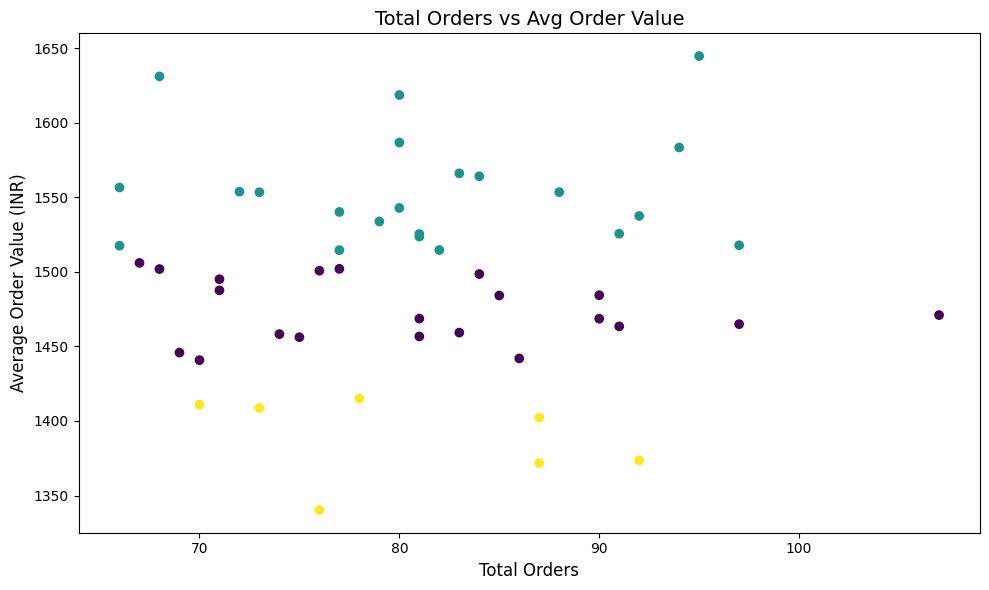

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_data['Total Orders'], customer_data['Average Order Value'], c=customer_data['Cluster'])

plt.title('Total Orders vs Avg Order Value', fontsize=14)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Average Order Value (INR)', fontsize=12)
plt.tight_layout()
plt.savefig('scatter_orders_vs_avg_value.png')
plt.show()

In [32]:
customer_data['Total Orders'] = pd.to_numeric(customer_data['Total Orders'], errors='coerce')
customer_data['Average Order Value'] = pd.to_numeric(customer_data['Average Order Value'], errors='coerce')

In [33]:
customer_stats = customer_data.dropna(subset=['Total Orders', 'Average Order Value'])

In [34]:
print(customer_stats['Cluster'].head())
print(customer_stats['Cluster'].dtype)

0    1
1    1
2    1
3    1
4    0
Name: Cluster, dtype: int32
int32


In [35]:
df['Profit Margin'] = df['Profit'] / df['Sales']

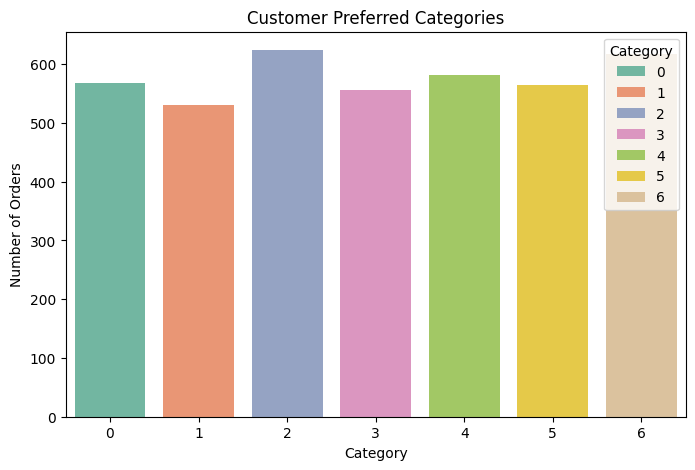

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Category', hue='Category', palette='Set2')
plt.title('Customer Preferred Categories')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

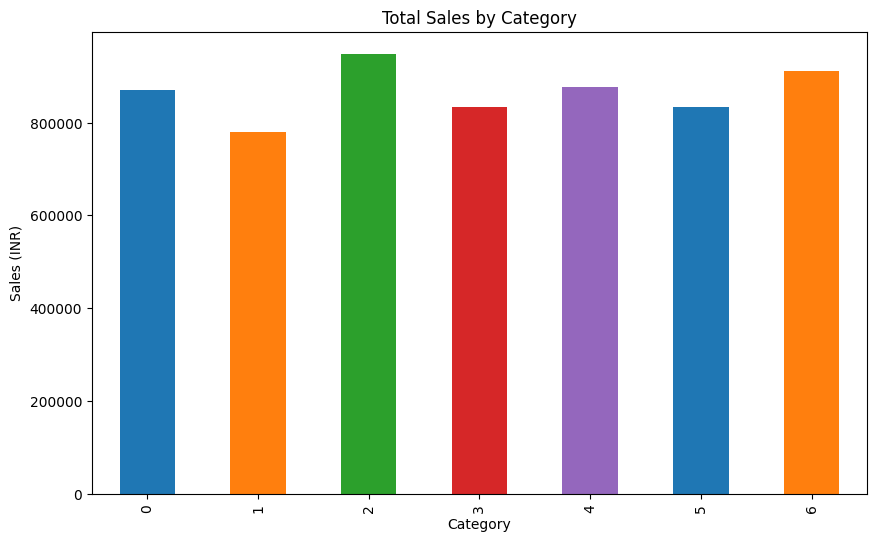

In [37]:
# Total sales by category
sales_category = df.groupby('Category')['Sales'].sum()

# Bar chart for sales by category
plt.figure(figsize=(10, 6))
sales_category.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales (INR)')
plt.show()

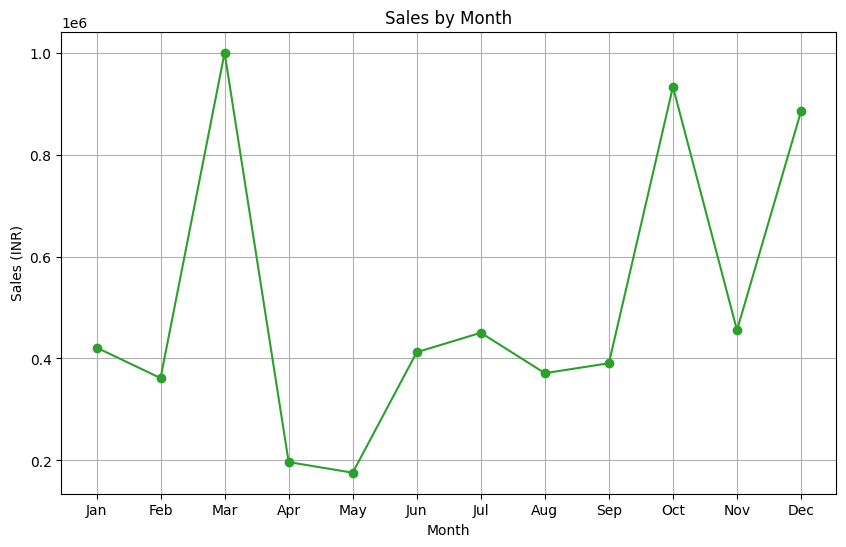

In [38]:
# Sum sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o', color='#2ca02c')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales (INR)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

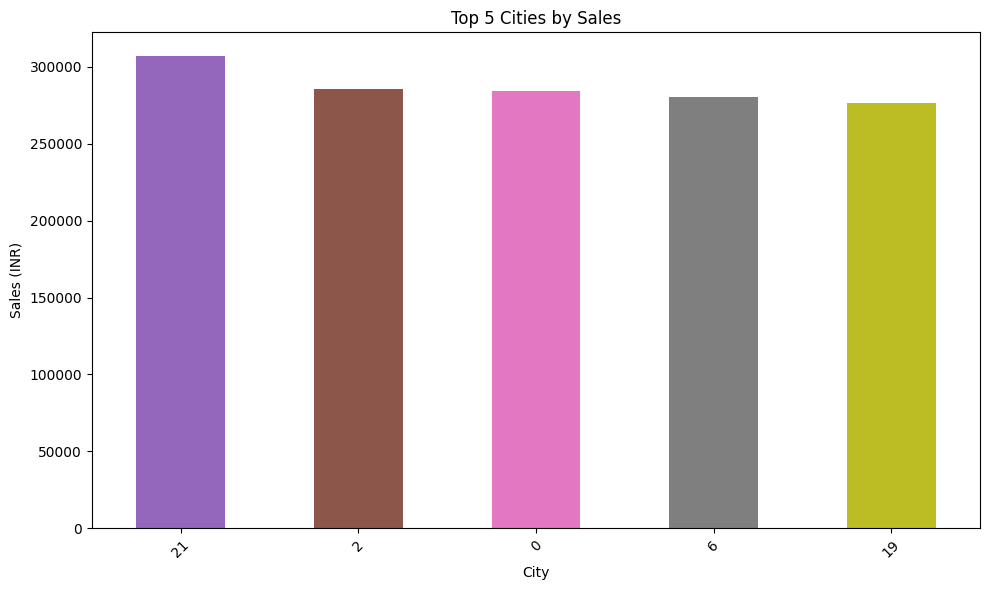

In [39]:
# Total sales by city (top 5)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)

# Bar chart for top cities
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
plt.title('Top 5 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_cities_sales.png')

Correlation Matrix (May 30, 2025):
              Sales    Profit  Discount
Sales     1.000000  0.604189 -0.017099
Profit    0.604189  1.000000 -0.019310
Discount -0.017099 -0.019310  1.000000


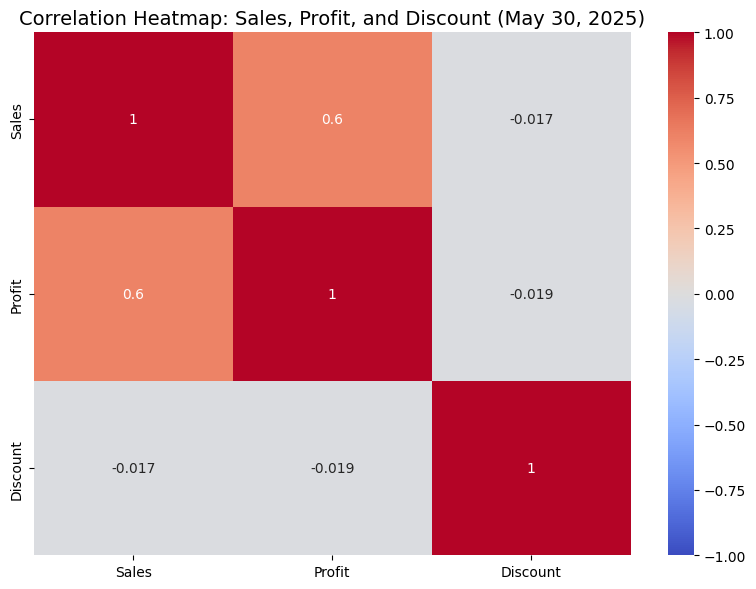

In [40]:

# Calculate correlations
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()
print("Correlation Matrix (May 30, 2025):\n", correlation_matrix)

# Visualize correlations with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Sales, Profit, and Discount (May 30, 2025)', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_heatmap_may30_2025.png')
plt.show()

In [41]:
print(df.columns)

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'profit_margin', 'discount_category', 'Month', 'Profit Margin'],
      dtype='object')


In [42]:
print(df[['Sales', 'profit_margin', 'discount_category']].head())


   Sales  profit_margin discount_category
0   1254           0.32            Medium
1    749           0.20            Medium
2   2360           0.07              High
3    896           0.10              High
4   2355           0.39              High


In [43]:
df['profit_margin'] = df['Profit'] / df['Sales']

df['discount_category'] = pd.cut(df['Discount'],
                                 bins=[-0.01, 0.1, 0.2, 1.0],
                                 labels=['Low', 'Medium', 'High'])

In [44]:

try:

    if 'Customer Name' not in df.columns or ('discount' in df.columns and 'Sales' not in df.columns):
        print("df seems to be the simulated data or missing original columns. Reloading and reprocessing original data.")
        # Assuming the path is still correct
        df = pd.read_csv("/content/Supermart Grocery Sales - Retail Analytics Dataset.csv")

        # Re-apply necessary preprocessing steps from earlier cells
        df.columns=df.columns.str.strip() # Strip spaces
        # Calculate profit margin (assuming Profit and Sales columns exist after strip)
        df['profit_margin'] = df['Profit'] / df['Sales']
        # Categorize discount levels
        df['discount_category'] = pd.cut(df['Discount'],
                                         bins=[-0.01, 0.1, 0.2, 1.0], # Use the bins/labels from the original data processing
                                         labels=['Low', 'Medium', 'High'])
        # Convert Order Date to datetime and handle potential errors
        df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
        df.dropna(subset=['Order Date'], inplace=True) # Drop rows where date parsing failed

        print("Original data reloaded and preprocessed.")
    else: # This 'else' was misaligned
        print("df appears to be the correct original data. Proceeding with plotting.")

except FileNotFoundError:
    print("Error: Original data file not found at '/content/Supermart Grocery Sales - Retail Analytics Dataset.csv'.")
    print("Please ensure the CSV file is in the correct location or update the path.")
except KeyError as e:
    print(f"Error: Required column not found after reloading: {e}")
    print("Please check the CSV file and the preprocessing steps.")
except Exception as e:
    print(f"An unexpected error occurred during data reload/preprocessing: {e}")


df appears to be the correct original data. Proceeding with plotting.


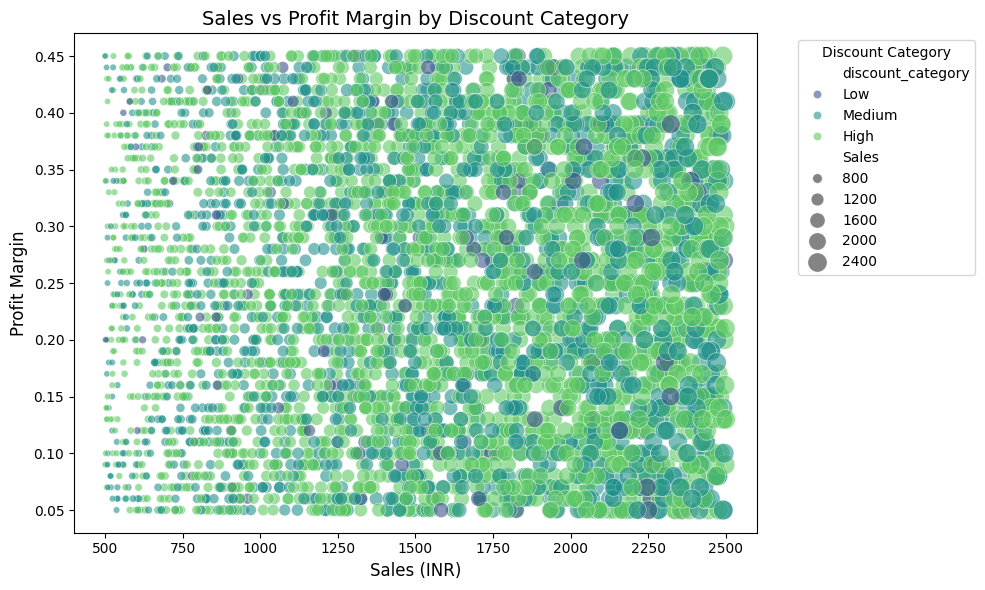

In [45]:
#Sales vs Profit Margin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='profit_margin', hue='discount_category', size='Sales', sizes=(20, 200), palette='viridis', alpha=0.6)
plt.title('Sales vs Profit Margin by Discount Category', fontsize=14)
plt.xlabel('Sales (INR)', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.legend(title='Discount Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('sales_vs_profit_margin_scatter.png')
plt.show()

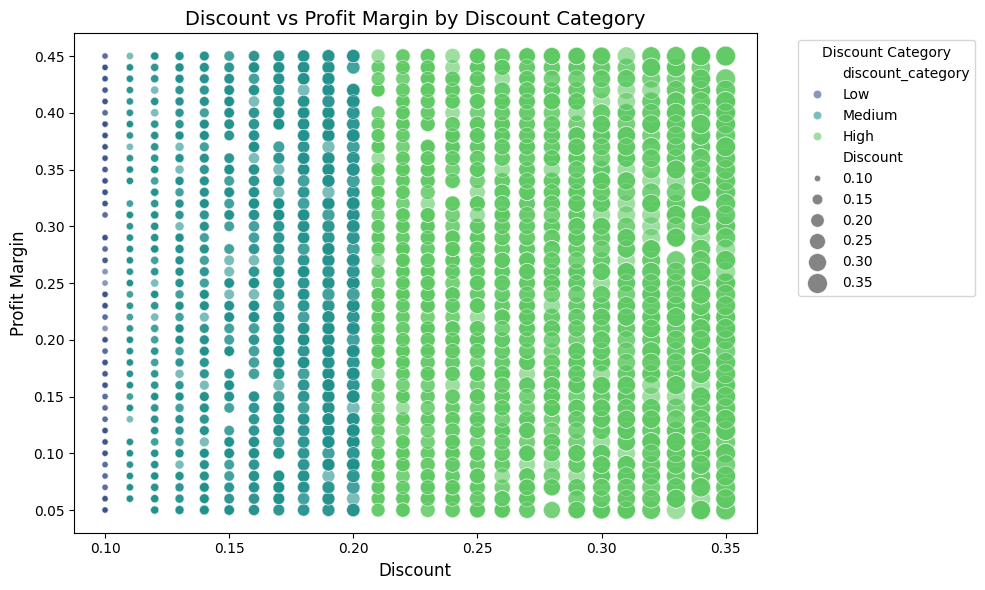

In [46]:
# Discount vs Profit Margin
plt.figure(figsize=(10, 6))
# Use 'Discount' (capitalized) and 'profit_margin', 'discount_category'
# Use 'Discount' for the size parameter as originally intended
sns.scatterplot(data=df, x='Discount', y='profit_margin', hue='discount_category', size='Discount',sizes=(20, 200), palette='viridis', alpha=0.6)
plt.title('Discount vs Profit Margin by Discount Category', fontsize=14)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.legend(title='Discount Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('discount_vs_profit_margin_scatter.png')
plt.show()

In [47]:
data = {'discount': np.random.uniform(0, 0.4, 1000),'sales': np.random.randint(50000, 500000, 1000),'profit_margin': np.random.uniform(0.1, 0.5, 1000)}  # Random profit margins


In [48]:
df = pd.DataFrame(data)
df['sales'] = df['sales'] * (1 + df['discount'] * 2)
df['profit_margin'] = df['profit_margin'] * (1 - df['discount'] * 1.5)

In [49]:
df['discount_category'] = pd.cut(df['discount'], bins=[0, 0.1, 0.2, 0.4], labels=['Low (0-0.1)', 'Moderate (0.1-0.2)', 'High (>0.2)'])
summary = df.groupby('discount_category').agg({'sales': 'mean', 'profit_margin': 'mean'}).reset_index()


/tmp/ipython-input-49-1332949571.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('discount_category').agg({'sales': 'mean', 'profit_margin': 'mean'}).reset_index()


In [50]:
print("Average Sales and Profit Margin by Discount Category:")
print(summary)


Average Sales and Profit Margin by Discount Category:
    discount_category          sales  profit_margin
0         Low (0-0.1)  312040.853956       0.272416
1  Moderate (0.1-0.2)  357957.763342       0.232239
2         High (>0.2)  446992.928092       0.164327


([0, 1, 2],
 [Text(0, 0, 'Low (0-0.1)'),
  Text(1, 0, 'Moderate (0.1-0.2)'),
  Text(2, 0, 'High (>0.2)')])

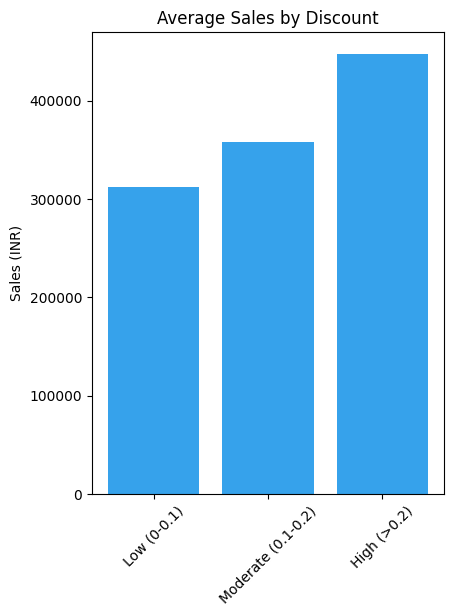

In [51]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(summary['discount_category'], summary['sales'], color='#36A2EB')
plt.title('Average Sales by Discount')
plt.ylabel('Sales (INR)')
plt.xticks(rotation=45)

In [52]:
data = {'discount': np.random.uniform(0, 0.4, 1000),
    'sales': np.random.randint(50000, 500000, 1000),
    'profit_margin': np.random.uniform(0.1, 0.5, 1000)}

In [53]:
# Adjust sales and profit margin based on discount (simplified relationship)
df = pd.DataFrame(data)
df['sales'] = df['sales'] * (1 + df['discount'] * 2)
df['profit_margin'] = df['profit_margin'] * (1 - df['discount'] * 1.5)

In [54]:
# Categorize discounts
df['discount_category'] = pd.cut(df['discount'], bins=[0, 0.1, 0.2, 0.4], labels=['Low (0-0.1)', 'Moderate (0.1-0.2)', 'High (>0.2)'])


In [55]:
# Group by discount category and calculate average sales and profit margin
summary = df.groupby('discount_category').agg({'sales': 'mean', 'profit_margin': 'mean'}).reset_index()

# Print the summary
print("Average Sales and Profit Margin by Discount Category:")
print(summary)

Average Sales and Profit Margin by Discount Category:
    discount_category          sales  profit_margin
0         Low (0-0.1)  304100.070098       0.273532
1  Moderate (0.1-0.2)  361565.844414       0.224461
2         High (>0.2)  448502.481484       0.165500


/tmp/ipython-input-55-855617089.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('discount_category').agg({'sales': 'mean', 'profit_margin': 'mean'}).reset_index()


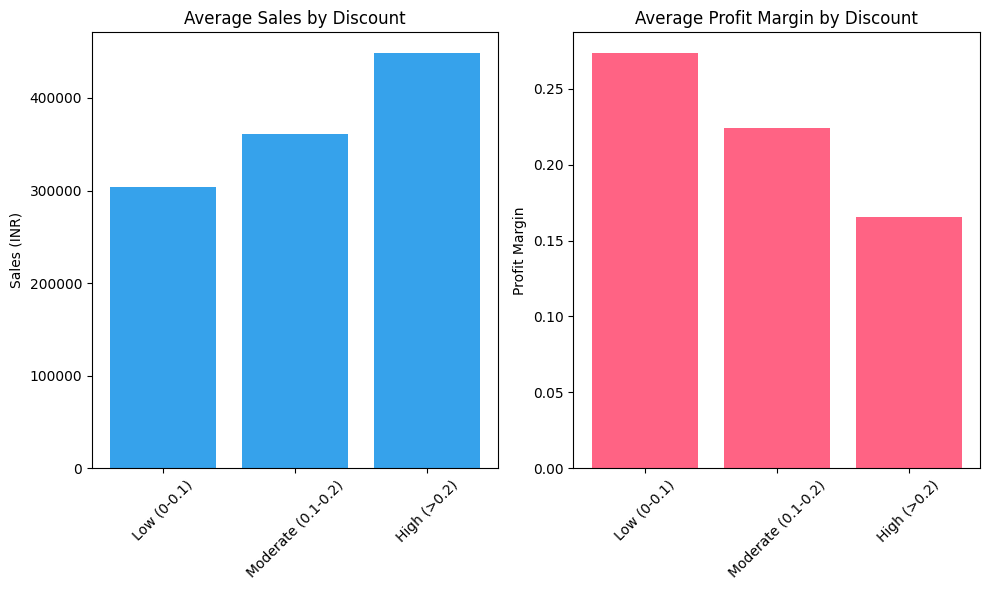

In [56]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(summary['discount_category'], summary['sales'], color='#36A2EB')
plt.title('Average Sales by Discount')
plt.ylabel('Sales (INR)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(summary['discount_category'], summary['profit_margin'], color='#FF6384')
plt.title('Average Profit Margin by Discount')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [57]:
# Focus on moderate discounts (0.1–0.2) for deeper analysis
moderate_df = df[(df['discount'] >= 0.1) & (df['discount'] <= 0.2)]
print("\nModerate Discounts (0.1–0.2) Analysis:")
print(f"Average Sales: {moderate_df['sales'].mean():,.2f} INR")
print(f"Average Profit Margin: {moderate_df['profit_margin'].mean():.2%}")


Moderate Discounts (0.1–0.2) Analysis:
Average Sales: 361,565.84 INR
Average Profit Margin: 22.45%


In [58]:
# Bin discounts into categories
df['Discount Bin'] = pd.cut(df['discount'], bins=[0, 0.1, 0.2, 0.3, 1], labels=['Very Low', 'Low', 'Medium', 'High'])

# Sales and profit by discount bin
discount_impact = df.groupby('Discount Bin').agg({'sales': 'sum', 'profit_margin': 'mean' }).reset_index()

/tmp/ipython-input-58-1620412042.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount Bin').agg({'sales': 'sum', 'profit_margin': 'mean' }).reset_index()


<Figure size 1000x600 with 0 Axes>

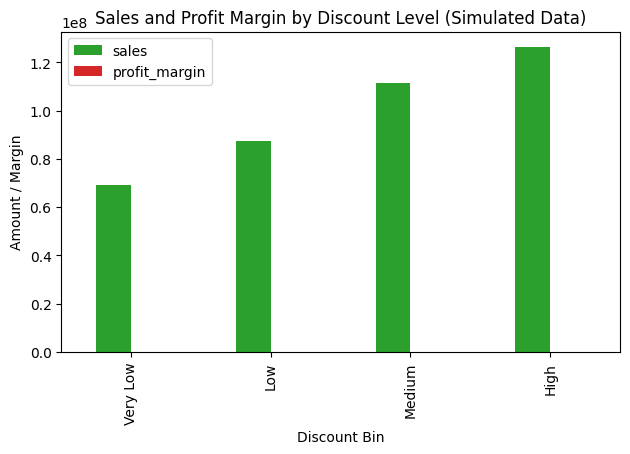

In [59]:
plt.figure(figsize=(10, 6))
discount_impact.plot(x='Discount Bin', y=['sales', 'profit_margin'], kind='bar', color=['#2ca02c', '#d62728'])
plt.title('Sales and Profit Margin by Discount Level (Simulated Data)')
plt.xlabel('Discount Bin')
plt.ylabel('Amount / Margin')
plt.tight_layout()
plt.savefig('discount_impact.png')
plt.show()

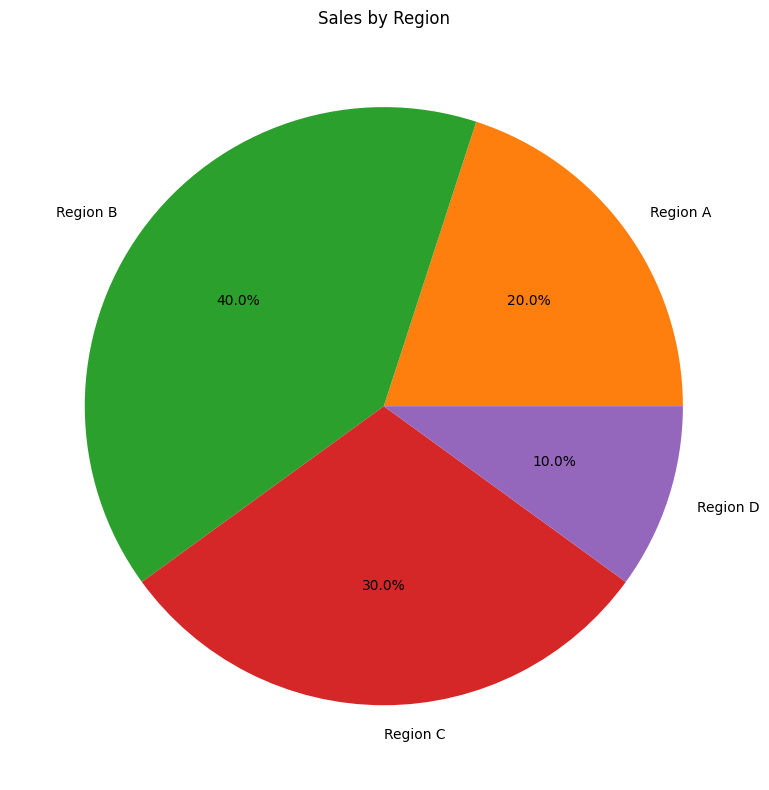

In [60]:
region_sales = [100, 200, 150, 50]  # Placeholder data
region_sales_index = ["Region A", "Region B", "Region C", "Region D"]

plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales_index, autopct='%1.1f%%', colors=['#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Sales by Region')
plt.tight_layout()
plt.savefig('region_sales.png')
plt.show()

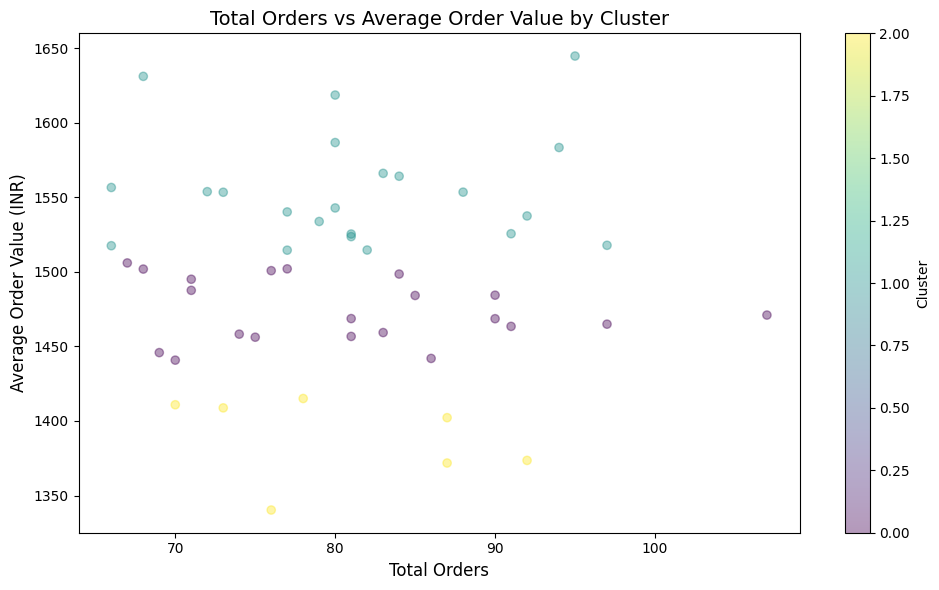

In [61]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(customer_data['Total Orders'],customer_data['Average Order Value'],c=customer_data['Cluster'],cmap='viridis',alpha=0.4)
plt.title('Total Orders vs Average Order Value by Cluster', fontsize=14)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Average Order Value (INR)', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('scatter_orders_vs_avg_value_by_cluster.png')
plt.show()

In [62]:
print(df.columns.tolist())

['discount', 'sales', 'profit_margin', 'discount_category', 'Discount Bin']


In [63]:
df.columns = df.columns.str.strip()

In [64]:
cluster_summary = customer_stats.groupby('Cluster').agg({'Total Orders': 'mean','Average Order Value': 'mean','Customer Name': 'count'}).reset_index()

print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
    Cluster  Total Orders  Average Order Value  Customer Name
0        0     80.619048          1474.099525             21
1        1     81.181818          1554.781257             22
2        2     80.428571          1388.956193              7


In [65]:
high_value_customers = customer_stats[customer_stats['Average Order Value'] > 1500]
print(high_value_customers.columns)


Index(['Customer Name', 'Total Orders', 'Sales', 'Average Order Value',
       'Cluster'],
      dtype='object')


In [66]:
print(high_value_customers.columns)


Index(['Customer Name', 'Total Orders', 'Sales', 'Average Order Value',
       'Cluster'],
      dtype='object')


In [67]:
preferred_categories =('Egg','Meat','fish')
print(preferred_categories)

('Egg', 'Meat', 'fish')


In [68]:
import pandas as pd

preferred_categories = pd.Series(['Egg', 'Meat', 'fish'])
print(preferred_categories.head())


0     Egg
1    Meat
2    fish
dtype: object


In [69]:

try:

    if 'discount' in df.columns and 'Customer Name' not in df.columns:
        print("df seems to be the simulated data. Reloading original data.")
        df.columns=df.columns.str.strip()
        df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
        df.dropna(subset=['Order Date'], inplace=True) # Drop rows where date parsing failed
        df['Month'] = df['Order Date'].dt.month_name()
        le = LabelEncoder()
        for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
            # Check if column exists and is not already numerical
            if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
                 df[col] = le.fit_transform(df[col])

except Exception as e:
    print(f"Could not reload original data: {e}")

df seems to be the simulated data. Reloading original data.
Could not reload original data: 'Order Date'


In [78]:
# Now, the original df should be loaded and ready for the groupby operation
print("Columns after reloading:", df.columns.tolist()) # Verify columns exist

# The failing code from ipython-input-71-3779075282
# Ensure 'Customer Name' and 'Category' are in the printed columns list above before proceeding
category_counts = df.groupby(['Customer Name', 'Category']).size().reset_index(name='Order Count')

# The rest of the code that followed in your notebook can go here,
# assuming it relies on the original df structure and the category_counts dataframe.
preferred_category = category_counts.sort_values('Order Count', ascending=False) \
                                    .drop_duplicates('Customer Name') \
                                    .rename(columns={'Category': 'Preferred_Category'})

# ... rest of the code involving preferred_category and merging with customer_stats
# (Ensure customer_stats is also derived from the original df if needed here)

Columns after reloading: ['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City', 'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State', 'Month']


In [79]:
preferred_category = category_counts.sort_values('Order Count', ascending=False) \
                                    .drop_duplicates('Customer Name') \
                                    .rename(columns={'Category': 'Preferred_Category'})

In [74]:
if 'Customer Name' in customer_stats.columns:
    customer_stats = customer_stats.merge(preferred_category[['Customer Name', 'Preferred_Category']],
                                          on='Customer Name',
                                          how='left')
    print("Merged preferred category into customer_stats.")
else:
    print("Error: 'Customer Name' column not found in customer_stats. Cannot merge preferred category.")

Merged preferred category into customer_stats.


In [75]:
cluster_labels = {}
for cluster in cluster_summary['Cluster']:
    total_orders = cluster_summary.loc[cluster_summary['Cluster'] == cluster, 'Total Orders'].values[0]
    avg_order_value = cluster_summary.loc[cluster_summary['Cluster'] == cluster, 'Average Order Value'].values[0]
    if total_orders > customer_stats['Total Orders'].mean() and avg_order_value > customer_stats['Average Order Value'].mean():
        cluster_labels[cluster] = 'High-Value'
    elif total_orders < customer_stats['Total Orders'].mean():
        cluster_labels[cluster] = 'Low-Frequency'
    else:
        cluster_labels[cluster] = 'Moderate'

In [80]:
# This line creates the 'Segment' column that was missing
customer_stats['Segment'] = customer_stats['Cluster'].map(cluster_labels)

# Identify high-value customers for loyalty programs
high_value_customers = customer_stats[customer_stats['Segment'] == 'High-Value']
print("High-Value Customers:\n", high_value_customers[['Customer Name', 'Total Orders', 'Average Order Value', 'Preferred_Category']].head())

High-Value Customers:
   Customer Name  Total Orders  Average Order Value  Preferred_Category
0        Adavan            94          1583.372340                   5
1         Aditi            68          1631.088235                   3
2         Akash            77          1514.545455                   4
3          Alan            77          1540.181818                   2
7        Arutra            92          1537.478261                   2
Low-Frequency Customers:
    Customer Name  Total Orders  Average Order Value  Preferred_Category
4         Amrish           107          1471.028037                   3
5            Amy            74          1458.243243                   3
6            Anu            71          1495.056338                   1
9         Esther            85          1484.164706                   6
10        Ganesh            76          1340.302632                   6


In [81]:
# Identify low-frequency customers for promotions
low_frequency_customers = customer_stats[customer_stats['Segment'] == 'Low-Frequency']
print("Low-Frequency Customers:\n", low_frequency_customers[['Customer Name', 'Total Orders', 'Average Order Value', 'Preferred_Category']].head())

Low-Frequency Customers:
    Customer Name  Total Orders  Average Order Value  Preferred_Category
4         Amrish           107          1471.028037                   3
5            Amy            74          1458.243243                   3
6            Anu            71          1495.056338                   1
9         Esther            85          1484.164706                   6
10        Ganesh            76          1340.302632                   6


In [83]:
print(df.columns)


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Month'],
      dtype='object')


In [85]:
low_freq_promotions = low_frequency_customers[low_frequency_customers['Preferred_Category'] == 'Egg, Meat & Fish']
print("Low-Frequency Customers for Egg, Meat & Fish Promotions:\n",
      low_freq_promotions[['Customer Name', 'Total Orders', 'Preferred_Category']].head())


Low-Frequency Customers for Egg, Meat & Fish Promotions:
 Empty DataFrame
Columns: [Customer Name, Total Orders, Preferred_Category]
Index: []


In [86]:
# Tailor email campaigns based on cluster preferences
email_campaigns = customer_stats.groupby(['Cluster', 'Preferred_Category']).size().unstack(fill_value=0)
print("Cluster Preferences for Email Campaigns:\n", email_campaigns)


Cluster Preferences for Email Campaigns:
 Preferred_Category  0  1  2  3  4  5  6
Cluster                                
0                   0  2  5  3  5  2  4
1                   4  1  5  2  2  5  3
2                   1  1  1  1  0  0  3


<Figure size 1200x600 with 0 Axes>

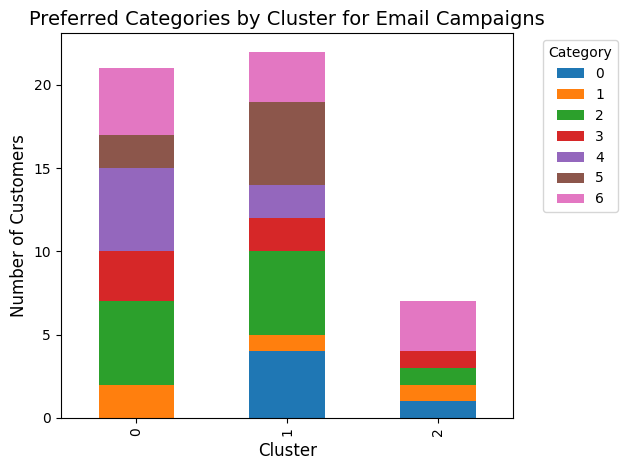

In [87]:
# Visualize cluster preferences
plt.figure(figsize=(12, 6))
email_campaigns.plot(kind='bar', stacked=True)
plt.title('Preferred Categories by Cluster for Email Campaigns', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('cluster_preferences.png')
plt.show()

In [91]:
high_value_customers = customer_stats[customer_stats['Segment'] == 'High-Value']
high_value_list = high_value_customers[['Customer Name', 'Preferred_Category']].to_dict('records')
print("Action 1: Launch Loyalty Program Today (June 21, 2025)")
print(f"Target {len(high_value_list)} High-Value Customers with a 10% loyalty discount on their preferred categories:")
for customer in high_value_list[:5]:
    print(f"- {customer['Customer Name']}: Offer 10% off on {customer['Preferred_Category']}")


Action 1: Launch Loyalty Program Today (June 21, 2025)
Target 22 High-Value Customers with a 10% loyalty discount on their preferred categories:
- Adavan: Offer 10% off on 5
- Aditi: Offer 10% off on 3
- Akash: Offer 10% off on 4
- Alan: Offer 10% off on 2
- Arutra: Offer 10% off on 2


In [93]:
low_freq_promotions = customer_stats[(customer_stats['Segment'] == 'Low-Frequency') & (customer_stats['Preferred_Category'] == 'Egg, Meat & Fish')]
low_freq_list = low_freq_promotions[['Customer Name']].to_dict('records')
print("\nAction 2: Send Promotions Today (June 21, 2025)")
print(f"Target {len(low_freq_list)} Low-Frequency Customers with a 15% discount on Egg, Meat & Fish:")
for customer in low_freq_list[:5]:  # Preview first 5
    print(f"- {customer['Customer Name']}: Send 15% off coupon for Egg, Meat & Fish")



Action 2: Send Promotions Today (June 21, 2025)
Target 0 Low-Frequency Customers with a 15% discount on Egg, Meat & Fish:


In [94]:
email_campaigns = customer_stats.groupby(['Segment', 'Preferred_Category']).size().unstack(fill_value=0)
print("\nAction 3: Schedule Email Campaigns for May 31, 2025")
print("Segment Preferences for Email Content:\n", email_campaigns)


Action 3: Schedule Email Campaigns for May 31, 2025
Segment Preferences for Email Content:
 Preferred_Category  0  1  2  3  4  5  6
Segment                                
High-Value          4  1  5  2  2  5  3
Low-Frequency       1  3  6  4  5  2  7


In [99]:
# Encode categorical variables
le = LabelEncoder()
# Changed 'Month Name' to 'Month' to match the column name in the DataFrame
for col in ['Category', 'Sub Category', 'City', 'Region', 'Month']:
    # Check if column exists before attempting to encode
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

In [100]:
cols_to_drop = ['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Profit Margin', 'State']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
features = df.drop(existing_cols_to_drop, axis=1)
target = df['Sales']


In [101]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Ensure these are also imported

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Feature importance analysis
feature_names = features.columns
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Mean Squared Error: 224977.65
R-squared: 0.33


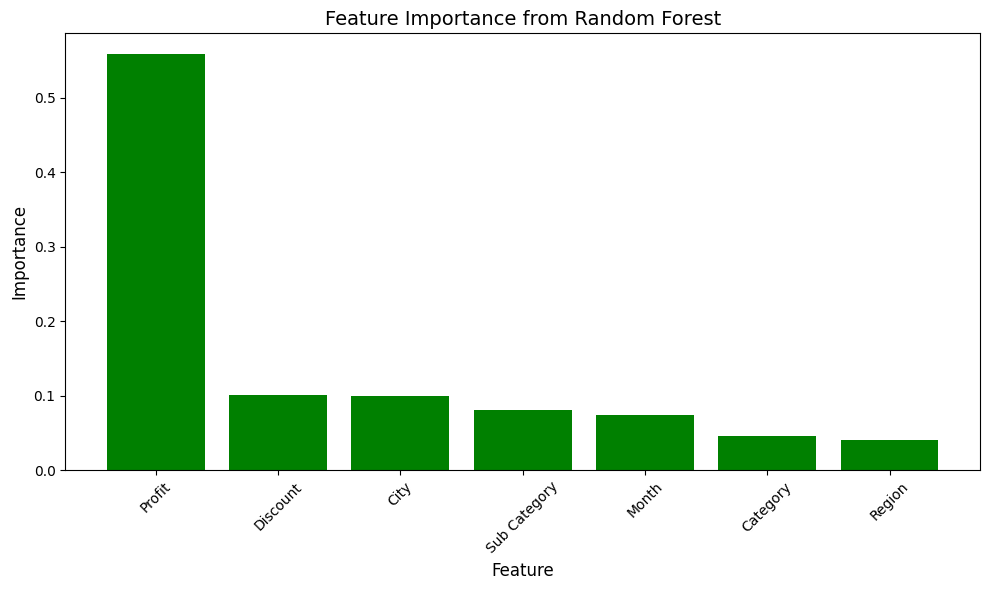

In [103]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.title('Feature Importance from Random Forest', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

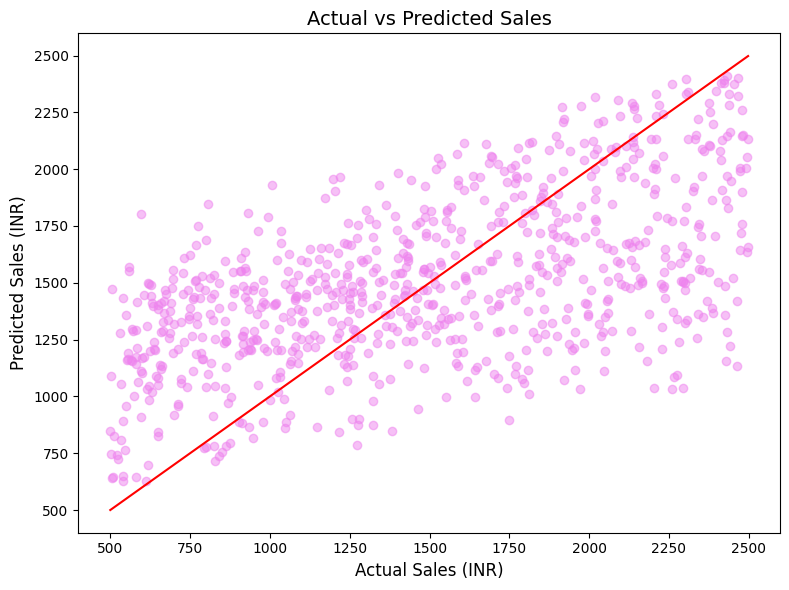

In [104]:
# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='violet', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales', fontsize=14)
plt.xlabel('Actual Sales (INR)', fontsize=12)
plt.ylabel('Predicted Sales (INR)', fontsize=12)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [105]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-squared: {grid_search.best_score_:.2f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best R-squared: 0.35
